In [35]:
import pandas as pd
import numpy as np



In [36]:
df = pd.read_csv('loan.csv')

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

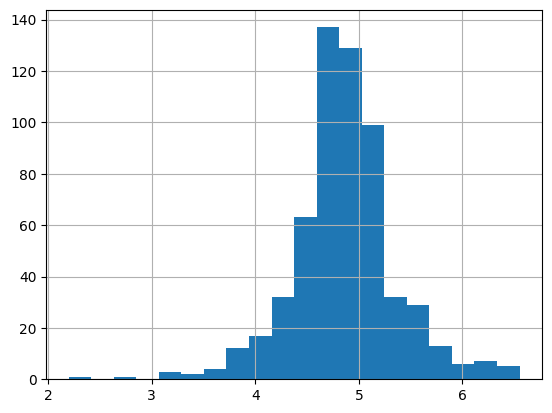

In [40]:
df['loanamount_log']=np.log(df['LoanAmount'])
df['loanamount_log'].hist(bins=20)

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanamount_log       22
dtype: int64

<Axes: >

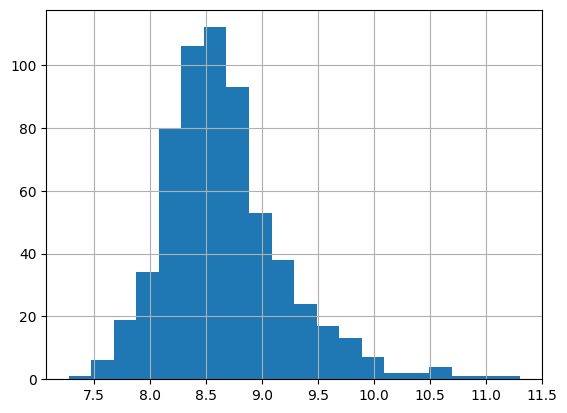

In [42]:
df['Totalincome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Totalincome_log']=np.log(df['Totalincome'])
df['Totalincome_log'].hist(bins=20)

In [43]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanamount_log = df.loanamount_log.fillna(df.loanamount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
Totalincome          0
Totalincome_log      0
dtype: int64

In [45]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y= df.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()


In [51]:
for i in range(0,5):
  X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i])
  X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])
print(X_train)

[[1 1 0 ... 1.0 4.875197323201151 267]
 [1 0 1 ... 1.0 5.278114659230517 407]
 [1 1 0 ... 0.0 5.003946305945459 249]
 ...
 [1 1 3 ... 1.0 5.298317366548036 363]
 [1 1 0 ... 1.0 5.075173815233827 273]
 [0 1 0 ... 1.0 5.204006687076795 301]]


In [52]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

In [53]:
for i in range(0,5):
  X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
  X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])
print(X_train)

[[1 1 0 ... 1.0 4.875197323201151 267]
 [1 0 1 ... 1.0 5.278114659230517 407]
 [1 1 0 ... 0.0 5.003946305945459 249]
 ...
 [1 1 3 ... 1.0 5.298317366548036 363]
 [1 1 0 ... 1.0 5.075173815233827 273]
 [0 1 0 ... 1.0 5.204006687076795 301]]


In [54]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train =ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
print("acc of random forest clf is",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of random forest clf is 0.7642276422764228


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred = dt_clf.predict(X_test)
print("acc of DT is",metrics.accuracy_score(y_pred,y_test))

acc of DT is 0.6829268292682927
